# US Political Party Affiliation: Data Exploration and Visualization

Yu chien (Calvin) Ma

## Data Cleaning

In [325]:
import pandas as pd
import numpy as np

In [326]:
df = pd.read_csv(r"TEST.csv")

In [327]:
df.head()

,name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [328]:
df.shape

(100, 18)

In [329]:
# Dataset is very clean already with features already scaled between 0-1, so no need to rescale
# Features name, party, state are all categorical, and features 1-15 are all numerical

In [330]:
# Check duplicates; there are no duplicates
len(df["name"].unique())

100

In [331]:
# Drop missing data
df.dropna(inplace=True)

In [332]:
# Dataset does not have any missing values
df.shape

(100, 18)

In [333]:
# Check for multicollinearity between features 1-15
corr_matrix = df.iloc[:,3:].corr()
corr_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,1.000000,-0.748194,-0.728347,0.150170,-0.743783,0.809405,-0.743783,0.046571,-0.720585,-0.714642,0.822404,0.709422,-0.694719,0.695756,0.806276
2,-0.748194,1.000000,0.921373,-0.190826,0.940315,-0.896510,0.899276,-0.071116,0.912145,0.918172,-0.869975,-0.898313,0.880300,-0.853129,-0.873826
3,-0.728347,0.921373,1.000000,-0.209044,0.979869,-0.861334,0.857856,-0.081390,0.908057,0.958933,-0.835672,-0.934256,0.874030,-0.811164,-0.803541
4,0.150170,-0.190826,-0.209044,1.000000,-0.204394,0.186416,-0.204394,0.067969,-0.170258,-0.162365,0.185199,0.217258,-0.222122,0.207769,0.168028
5,-0.743783,0.940315,0.979869,-0.204394,1.000000,-0.879824,0.877788,-0.078790,0.929029,0.979420,-0.854035,-0.955365,0.895438,-0.831304,-0.820486
6,0.809405,-0.896510,-0.861334,0.186416,-0.879824,1.000000,-0.838648,0.068590,-0.851918,-0.856271,0.931967,0.838600,-0.820978,0.874986,0.892535
7,-0.743783,0.899276,0.857856,-0.204394,0.877788,-0.838648,1.000000,-0.078790,0.929029,0.854639,-0.812567,-0.914555,0.936223,-0.872214,-0.778225
8,0.046571,-0.071116,-0.081390,0.067969,-0.078790,0.068590,-0.078790,1.000000,-0.084880,-0.080446,0.067686,0.085775,-0.088458,0.080497,0.057640
9,-0.720585,0.912145,0.908057,-0.170258,0.929029,-0.851918,0.929029,-0.084880,1.000000,0.927600,-0.826111,-0.964093,0.943986,-0.881978,-0.795065
10,-0.714642,0.918172,0.958933,-0.162365,0.979420,-0.856271,0.854639,-0.080446,0.927600,1.000000,-0.829641,-0.933773,0.872611,-0.807002,-0.794578


<AxesSubplot:title={'center':'Heatmap of Features 1-15'}>

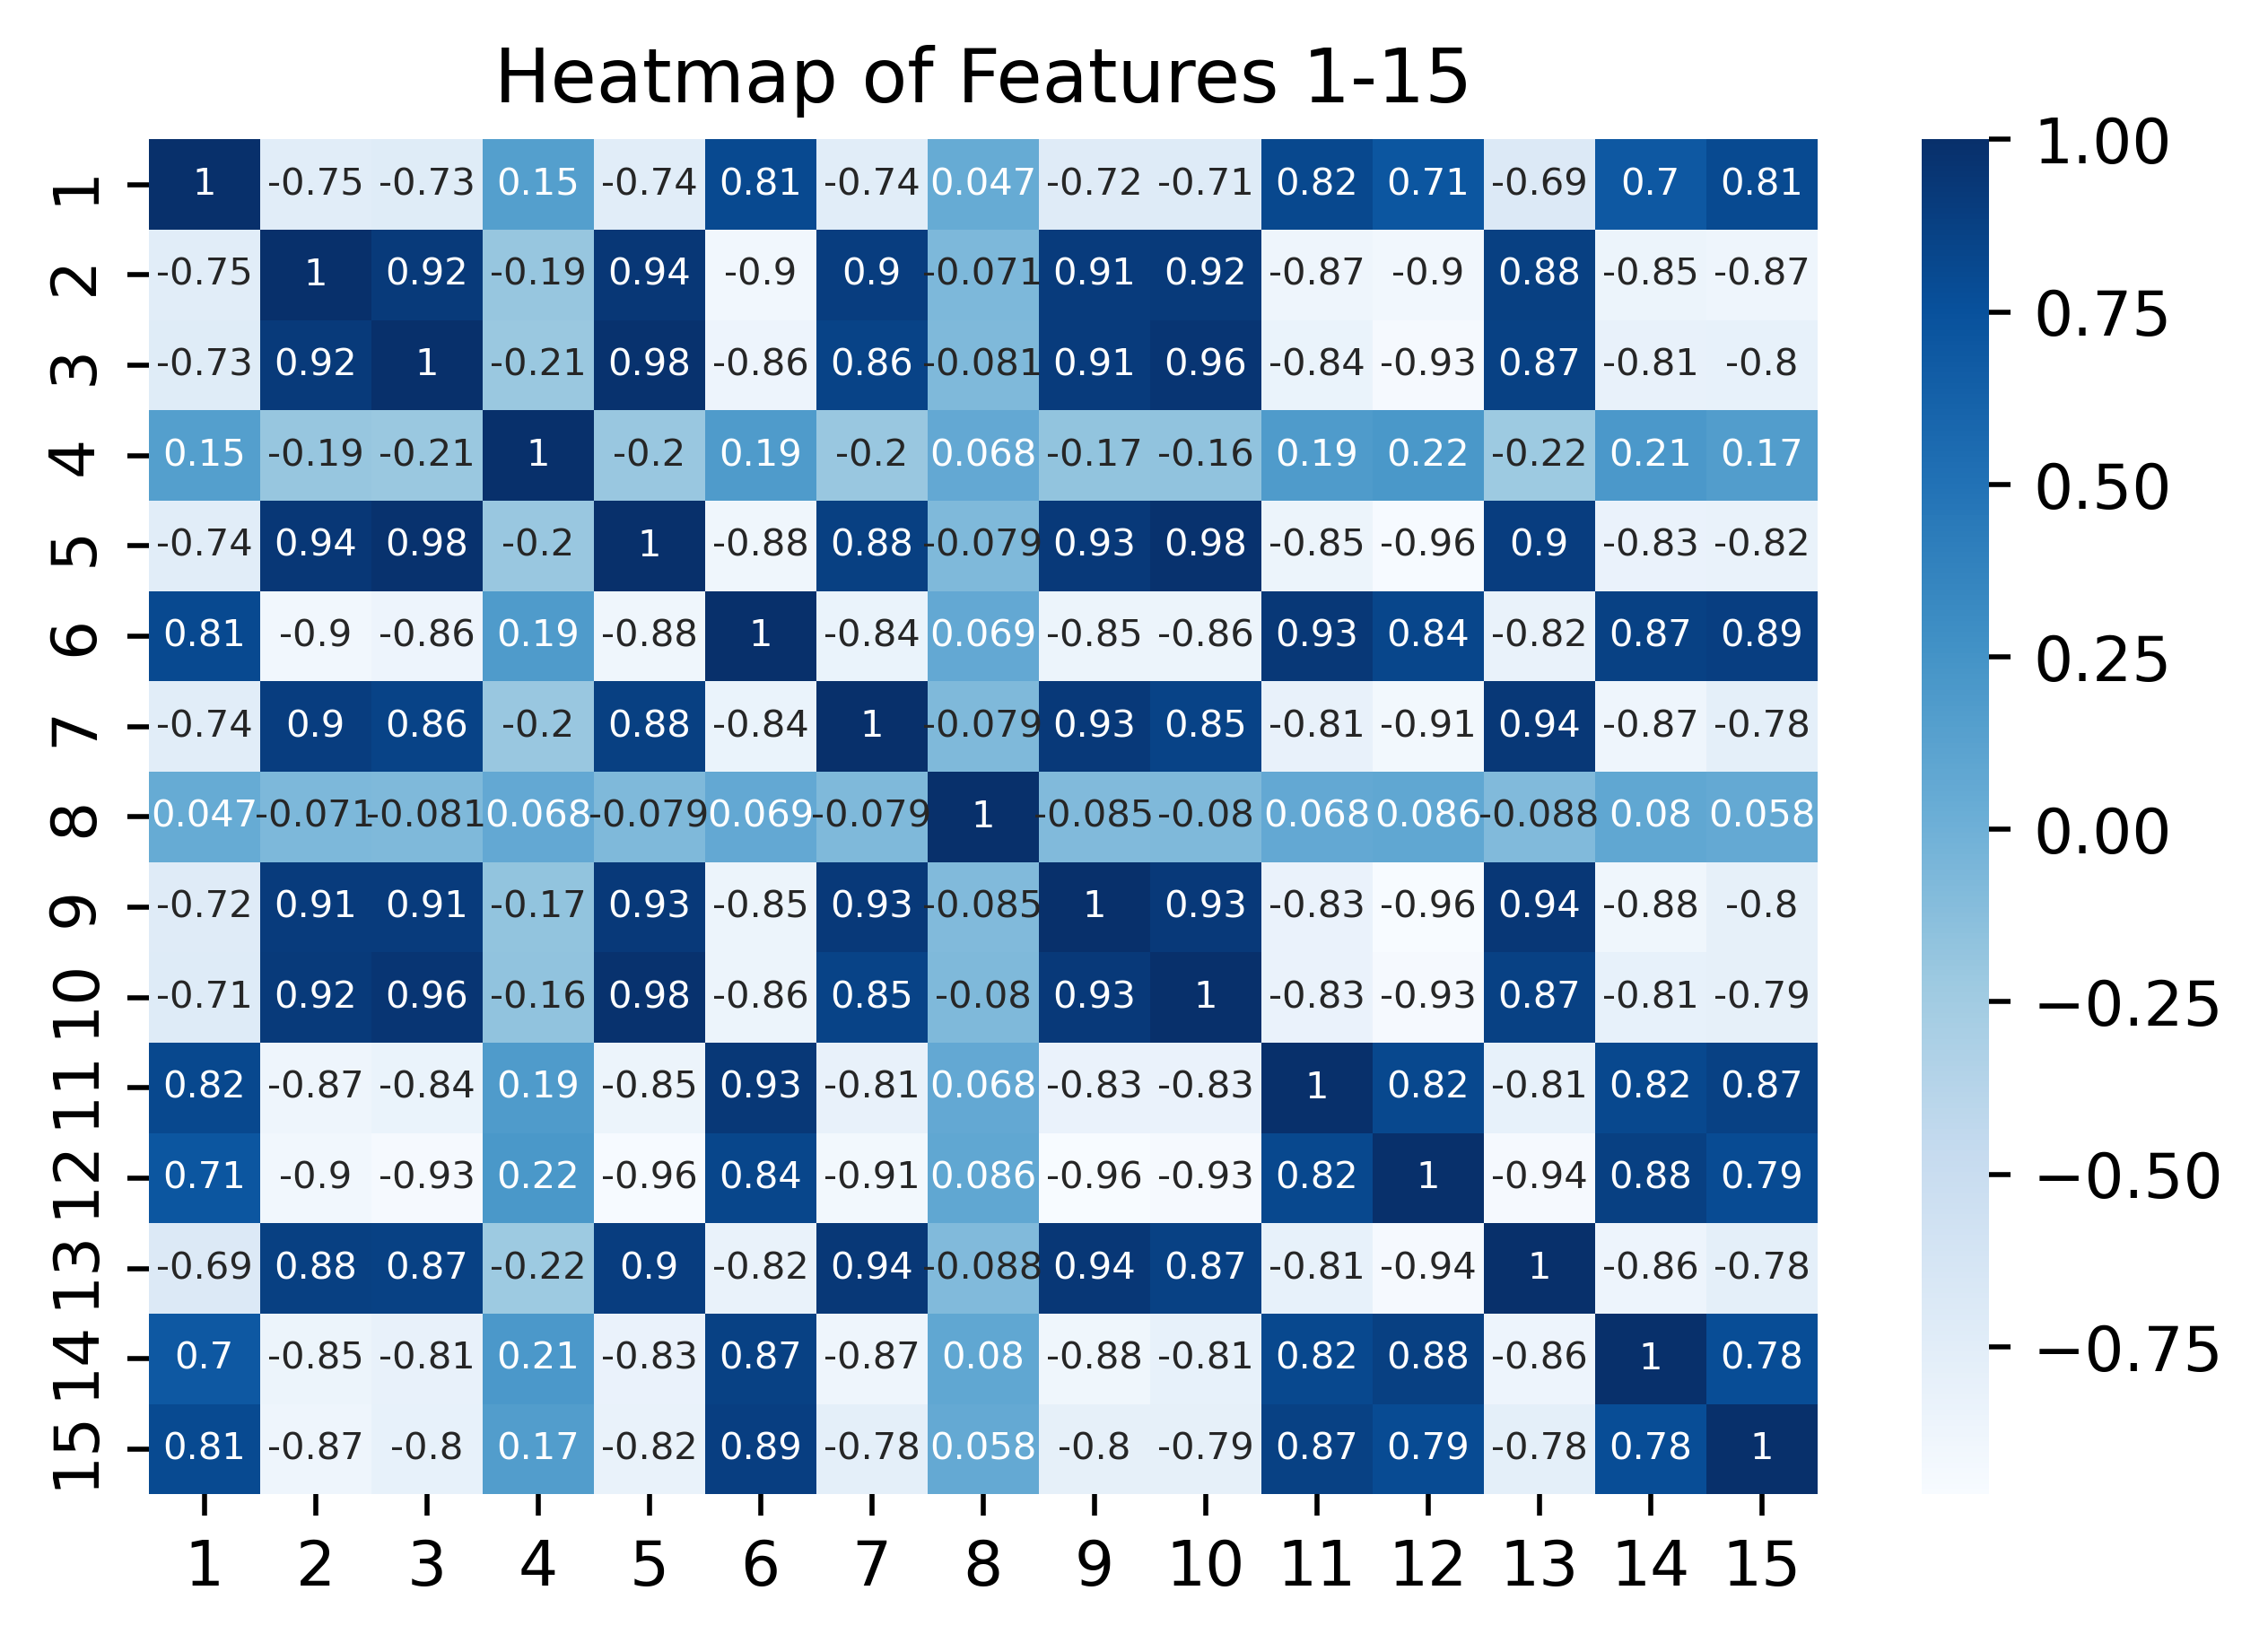

In [334]:
# There are many features with high correlation or high negative correlations with each other (|r| >0.7)

import seaborn as sns
hm = sns.heatmap(corr_matrix, annot=True, cmap="Blues",annot_kws={"fontsize":6})
hm.set(title='Heatmap of Features 1-15')
display(hm)

In [335]:
# Dark blues have high correlation with each other
# For example, features 2 and 3 have a 0.92 correlation with each other, so we will drop feature 3

In [336]:
# We're going to keep the first feature and drop the second one
# Anything above |r| >= 0.7 is going to be considered high collinearity, so only one will be kept
# Usually the threshold I would use is r>0.7, but I'm going to use 0.9 otherwise too much data will be dropped

columns = corr_matrix.columns 
my_tuples = []
for c in range(1, 16):
    for i, x in enumerate(list(corr_matrix[str(c)])):
        if abs(x)>=0.9 and x!=1:
            print (columns[i], c)
            my_tuples.append((int(columns[i]), c))

3 2
5 2
9 2
10 2
2 3
5 3
9 3
10 3
12 3
2 5
3 5
9 5
10 5
12 5
11 6
9 7
12 7
13 7
2 9
3 9
5 9
7 9
10 9
12 9
13 9
2 10
3 10
5 10
9 10
12 10
6 11
3 12
5 12
7 12
9 12
10 12
13 12
7 13
9 13
12 13


In [337]:
my_tuples

[(3, 2),
 (5, 2),
 (9, 2),
 (10, 2),
 (2, 3),
 (5, 3),
 (9, 3),
 (10, 3),
 (12, 3),
 (2, 5),
 (3, 5),
 (9, 5),
 (10, 5),
 (12, 5),
 (11, 6),
 (9, 7),
 (12, 7),
 (13, 7),
 (2, 9),
 (3, 9),
 (5, 9),
 (7, 9),
 (10, 9),
 (12, 9),
 (13, 9),
 (2, 10),
 (3, 10),
 (5, 10),
 (9, 10),
 (12, 10),
 (6, 11),
 (3, 12),
 (5, 12),
 (7, 12),
 (9, 12),
 (10, 12),
 (13, 12),
 (7, 13),
 (9, 13),
 (12, 13)]

In [338]:
to_drop = []
for t in my_tuples:
    if max(t) not in to_drop:
        to_drop.append(max(t))

In [339]:
# These are the columns to be dropped
to_drop

[3, 5, 9, 10, 12, 11, 13]

In [340]:
# Recalculate the correlation matrix
df2 = df.drop([str(x) for x in to_drop],axis=1)
corr_matrix2 = df2.corr()

In [341]:
corr_matrix2

,1,2,4,6,7,8,14,15
1,1.000000,-0.748194,0.150170,0.809405,-0.743783,0.046571,0.695756,0.806276
2,-0.748194,1.000000,-0.190826,-0.896510,0.899276,-0.071116,-0.853129,-0.873826
4,0.150170,-0.190826,1.000000,0.186416,-0.204394,0.067969,0.207769,0.168028
6,0.809405,-0.896510,0.186416,1.000000,-0.838648,0.068590,0.874986,0.892535
7,-0.743783,0.899276,-0.204394,-0.838648,1.000000,-0.078790,-0.872214,-0.778225
8,0.046571,-0.071116,0.067969,0.068590,-0.078790,1.000000,0.080497,0.057640
14,0.695756,-0.853129,0.207769,0.874986,-0.872214,0.080497,1.000000,0.784294
15,0.806276,-0.873826,0.168028,0.892535,-0.778225,0.057640,0.784294,1.000000


<AxesSubplot:title={'center':'Heatmap of Features 1-15'}>

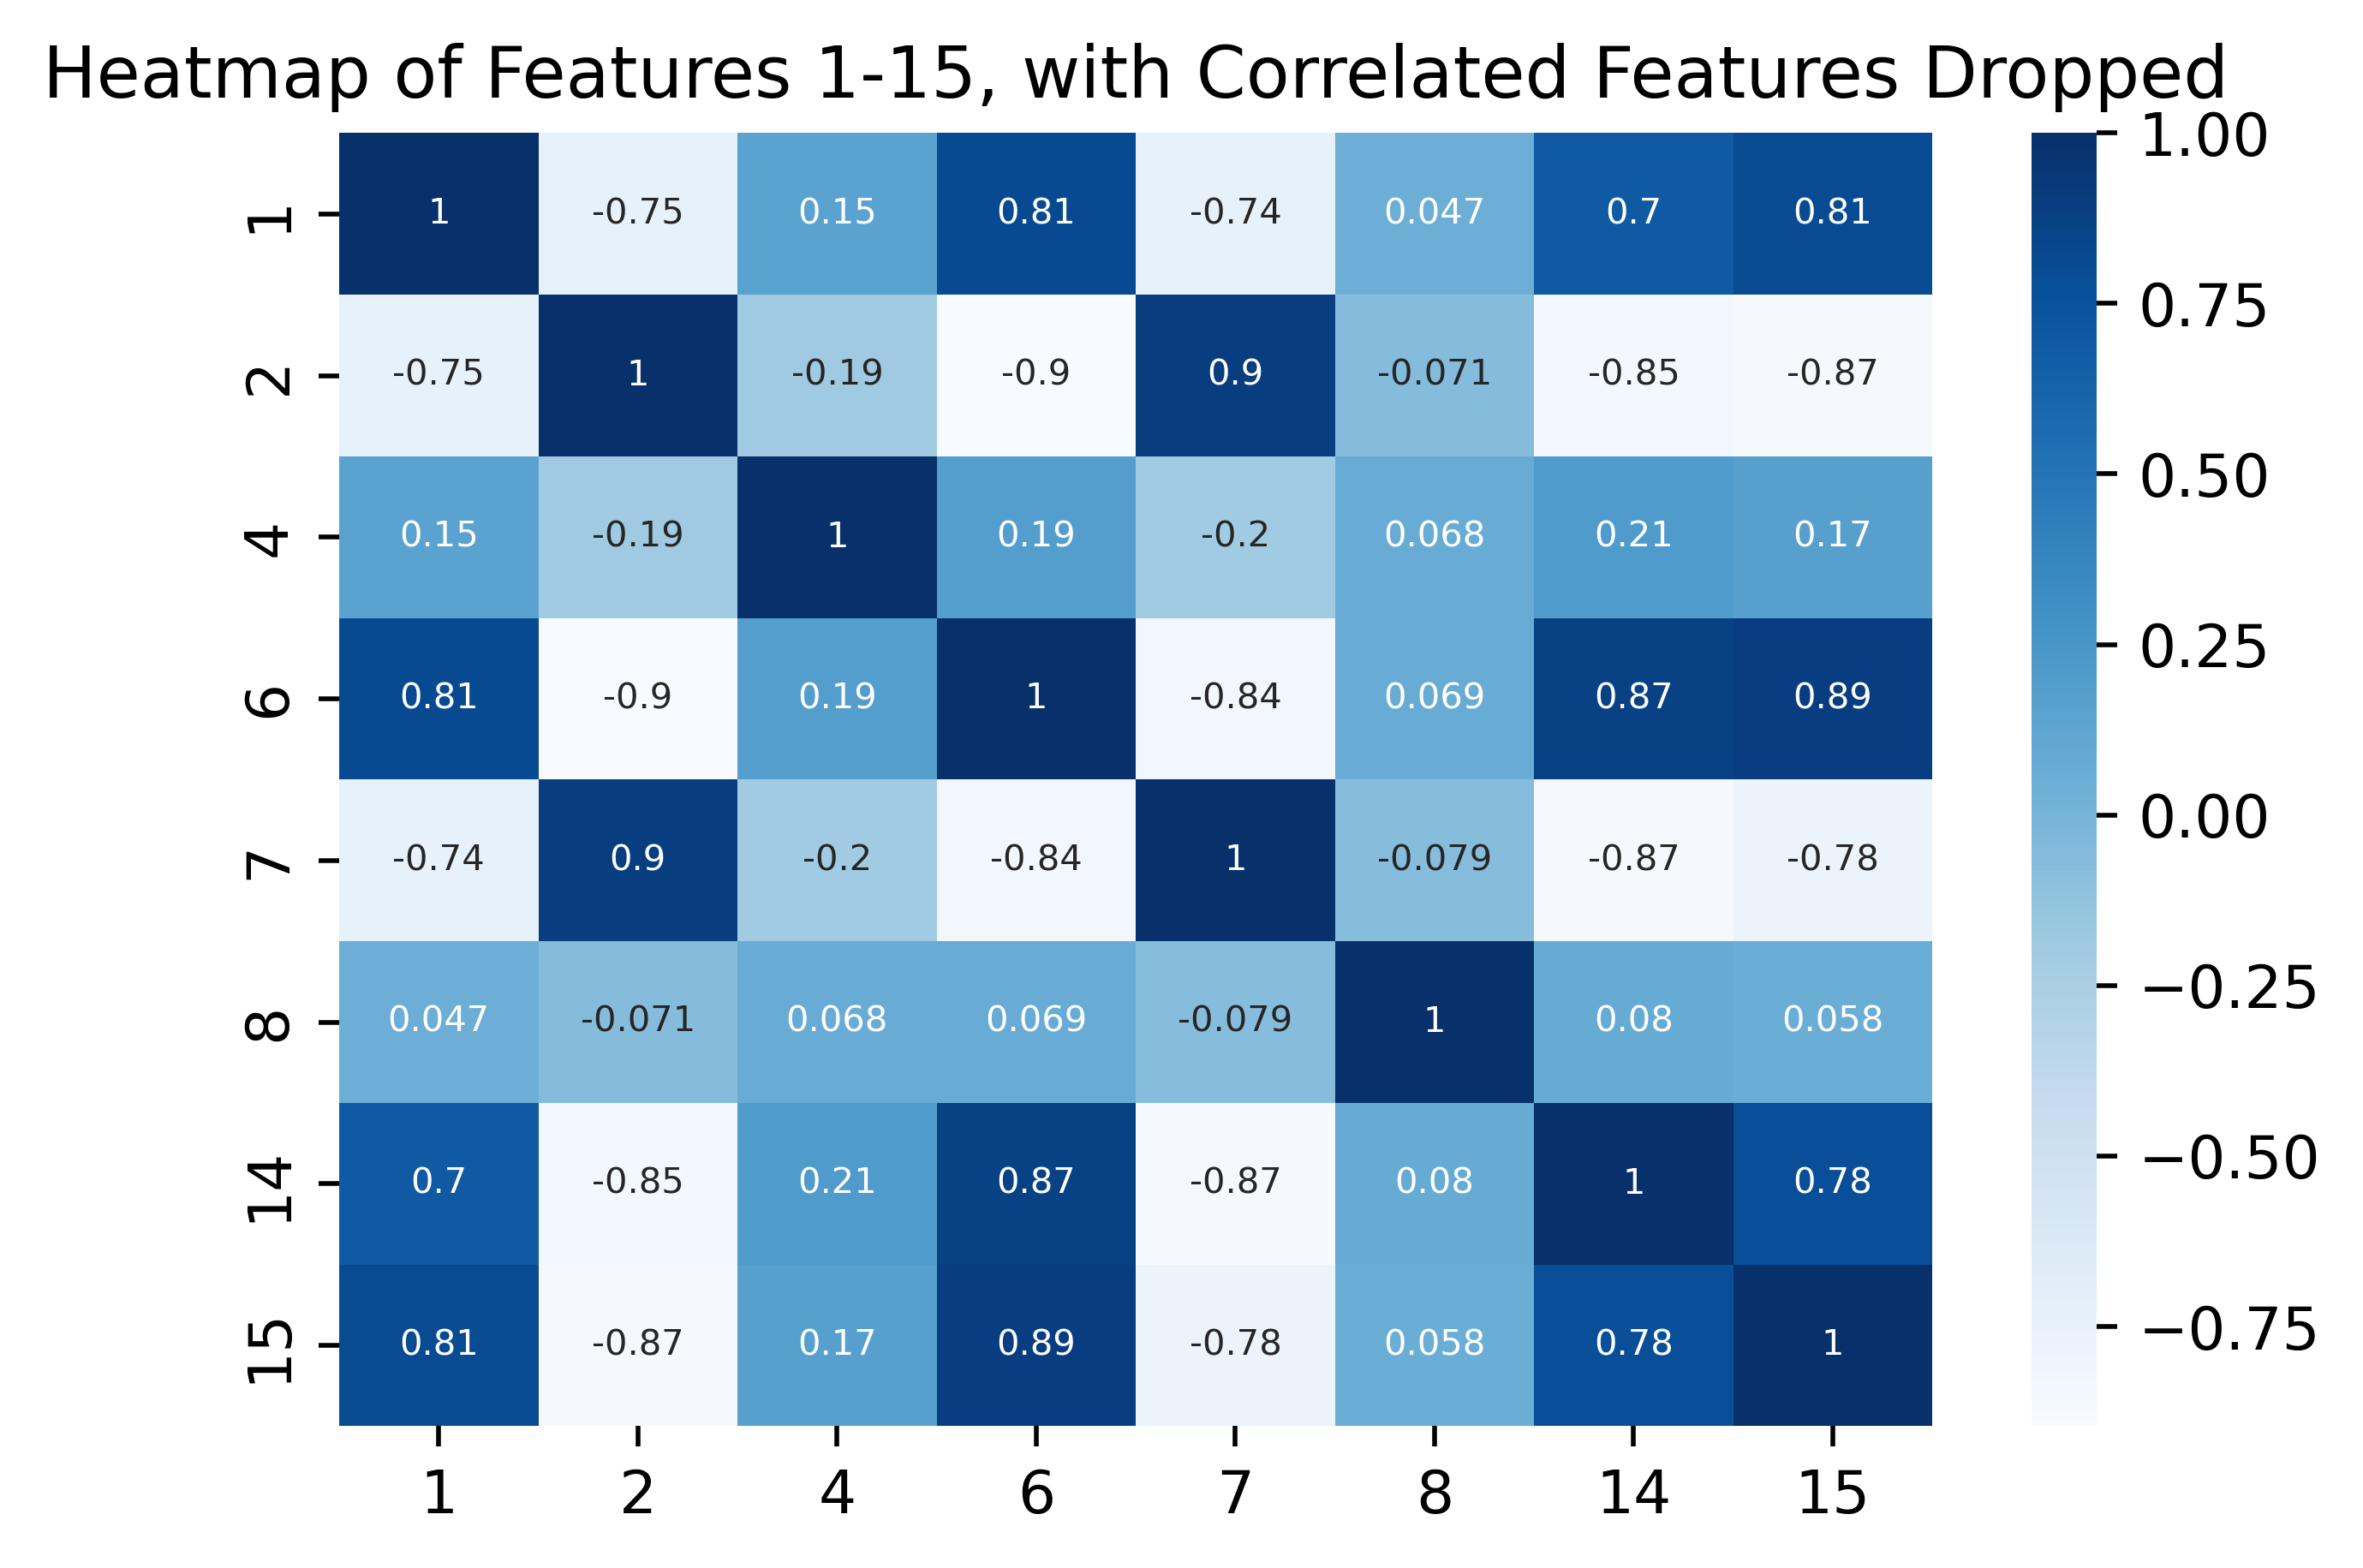

In [342]:
hm2 = sns.heatmap(corr_matrix2, annot=True, cmap="Blues",annot_kws={"fontsize":6})
hm2.set(title='Heatmap of Features 1-15, with Correlated Features Dropped')
display(hm)

# The reason why there are still a few 0.9 in the heatmap is because the value is 0.899276, and it was rounded up to 0.9

In [343]:
# Save a copy of the cleaned dataset
df2.to_csv("test_cleaned.csv")

## Data Exploration

In [344]:
df2.head()

,name,party,state,1,2,4,6,7,8,14,15
0,Alexander,R,TN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0


In [345]:
# Let's explore the features based on state
states = df2.groupby("state").mean()
states

,1,2,4,6,7,8,14,15
state,,,,,,,,
AK,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00
AL,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00
AR,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00
AZ,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00
CA,0.75,0.00,1.00,1.00,0.00,1.00,1.00,1.00
CO,0.00,0.50,1.00,0.50,0.50,1.00,0.50,0.00
CT,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
DE,0.50,0.00,1.00,1.00,0.00,1.00,1.00,1.00
FL,0.50,0.50,1.00,0.50,0.50,1.00,0.25,0.75


In [346]:
for i in states.columns:
    print(i, list(states[states[i]==1].index))

1 ['CT', 'HI', 'MA', 'MD', 'NJ', 'NY', 'OR', 'RI', 'VA', 'VT', 'WA']
2 ['AK', 'AL', 'AR', 'AZ', 'GA', 'IA', 'ID', 'KS', 'KY', 'LA', 'MS', 'NC', 'ND', 'NE', 'OK', 'SC', 'SD', 'TN', 'TX', 'UT', 'WV', 'WY']
4 ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NH', 'NJ', 'NM', 'NY', 'OH', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
6 ['CA', 'CT', 'DE', 'HI', 'IL', 'MA', 'MD', 'MI', 'MN', 'NJ', 'NM', 'NY', 'OR', 'RI', 'VA', 'VT', 'WA']
7 ['AK', 'AL', 'AR', 'AZ', 'GA', 'IA', 'ID', 'KS', 'KY', 'LA', 'MS', 'NC', 'ND', 'NE', 'OK', 'PA', 'SC', 'SD', 'TX', 'UT', 'WV', 'WY']
8 ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'

Observations:
- Feature 8 is generally all 1's across states, and it's the most common factor among all states
- Features 6, 14, and 15 seem like policies associated with blue (D) states
- Features 7 and 2 seem like policies associated with red (R) states

In [347]:
# Let's explore the features based on party
party = df2.groupby("party").mean()
party

,1,2,4,6,7,8,14,15
party,,,,,,,,
D,0.704545,0.079545,0.988636,0.875000,0.079545,0.988636,0.897727,0.784091
I,0.500000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
R,0.009259,1.000000,0.907407,0.018519,0.944444,0.981481,0.083333,0.009259


Observations
- Feature 1 is relatively popular among Democrats, evenly split among Independents, and extremely unpopular among Republicans
- Feature 2 and 7 are extremely popular among Republicans, and extremely unpopular among Democrats and Independents
- Features 4 and 8 are extremely popular regardless of political affiliation
- Features 6, 14, and 15 are extremely popular among Democrats and Independents, but extremely unpopular with Republicans
- This lines up with the analysis based on states

In [348]:
# Let's see the percentage of Democrats, Republicans, or Independents that live in each state
# Democrats=1, Independent=0.5, and Republicans = 0

num_party = []
for x in df2["party"]:
    if x=="D":
        num_party.append(1) 
    elif x=="I":
        num_party.append(0.5)
    else:
        num_party.append(0)

In [349]:
df2["affiliation"] = num_party

In [350]:
# Political leanings of each state (closer to 1==D, closer to 0==R) 
party2 = df2.groupby("state").mean()
affiliation = party2[['affiliation']].sort_values(by=['affiliation'])
affiliation

,affiliation
state,
AK,0.00
UT,0.00
TX,0.00
TN,0.00
SD,0.00
SC,0.00
OK,0.00
NE,0.00
NC,0.00


Observations
- Results are expected: states like California, New York, and New Jersey are majority Democrats, while states like Utah, Texas, and South Dakota are majority Republicans
- Traditional swing states like Wisconsin, Pennsylvania, and Florida have 0.5 which is an even mix of political affiliations

In [351]:
# Save a copy of the cleaned dataset
df2.to_csv("test_cleaned.csv")

## Data Visualization

In [352]:
import geopandas as gp
import matplotlib.pyplot as plt

# States shape files were downloaded from the US Census website: 
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
gdf = gp.read_file(r"cb_2018_us_state_500k.shp")

In [353]:
plt.rcParams['figure.dpi'] = 500

In [354]:
gdf['boundary'] = gdf.boundary
gdf["area"] = gdf.area


C:\Users\calvi\AppData\Local\Temp/ipykernel_10924/1225304276.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area


In [355]:
gdf

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,boundary,area
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...","MULTILINESTRING ((-88.50297 30.21523, -88.4917...",11.885417
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...","MULTILINESTRING ((-75.72681 35.93584, -75.7182...",12.782192
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...","LINESTRING (-103.00257 36.52659, -103.00219 36...",18.005001
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...","MULTILINESTRING ((-75.74241 37.80835, -75.7415...",10.685779
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...","LINESTRING (-82.64320 38.16909, -82.64300 38.1...",6.493880
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...","MULTILINESTRING ((-88.86770 29.86155, -88.8656...",11.544209
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...","MULTILINESTRING ((-83.19159 42.03537, -83.1899...",17.054770
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...","MULTILINESTRING ((-70.23405 41.28565, -70.2236...",2.318548
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...","LINESTRING (-117.24267 44.39655, -117.23484 44...",24.456461
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...","MULTILINESTRING ((-80.17628 25.52505, -80.1739...",13.934848


In [356]:
# Combining with affiliation
merged = pd.merge(affiliation, gdf, left_on='state', right_on='STUSPS')
merged = gp.GeoDataFrame(merged)
merged

,affiliation,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,boundary,area
0,0.00,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ...","MULTILINESTRING ((179.48246 51.98283, 179.4865...",282.010909
1,0.00,49,01455989,0400000US49,49,UT,Utah,00,212886221680,6998824394,"POLYGON ((-114.05296 37.59278, -114.05247 37.6...","LINESTRING (-114.05296 37.59278, -114.05247 37...",22.975117
2,0.00,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.71830 29.72885, -94.71721 ...","MULTILINESTRING ((-94.71830 29.72885, -94.7172...",65.327671
3,0.00,47,01325873,0400000US47,47,TN,Tennessee,00,106802728188,2350123465,"POLYGON ((-90.31030 35.00429, -90.30988 35.009...","LINESTRING (-90.31030 35.00429, -90.30988 35.0...",10.889272
4,0.00,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05788 44.99761, -104.05078 44.9...","LINESTRING (-104.05788 44.99761, -104.05078 44...",22.578332
5,0.00,45,01779799,0400000US45,45,SC,South Carolina,00,77864918488,5075218778,"MULTIPOLYGON (((-79.50795 33.02008, -79.50713 ...","MULTILINESTRING ((-79.50795 33.02008, -79.5071...",7.856399
6,0.00,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...","LINESTRING (-103.00257 36.52659, -103.00219 36...",18.005001
7,0.00,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05342 41.17054, -104.05324 41.1...","LINESTRING (-104.05342 41.17054, -104.05324 41...",21.614456
8,0.00,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...","MULTILINESTRING ((-75.72681 35.93584, -75.7182...",12.782192
9,0.00,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...","MULTILINESTRING ((-88.86770 29.86155, -88.8656...",11.544209


(-170.0, -65.0)

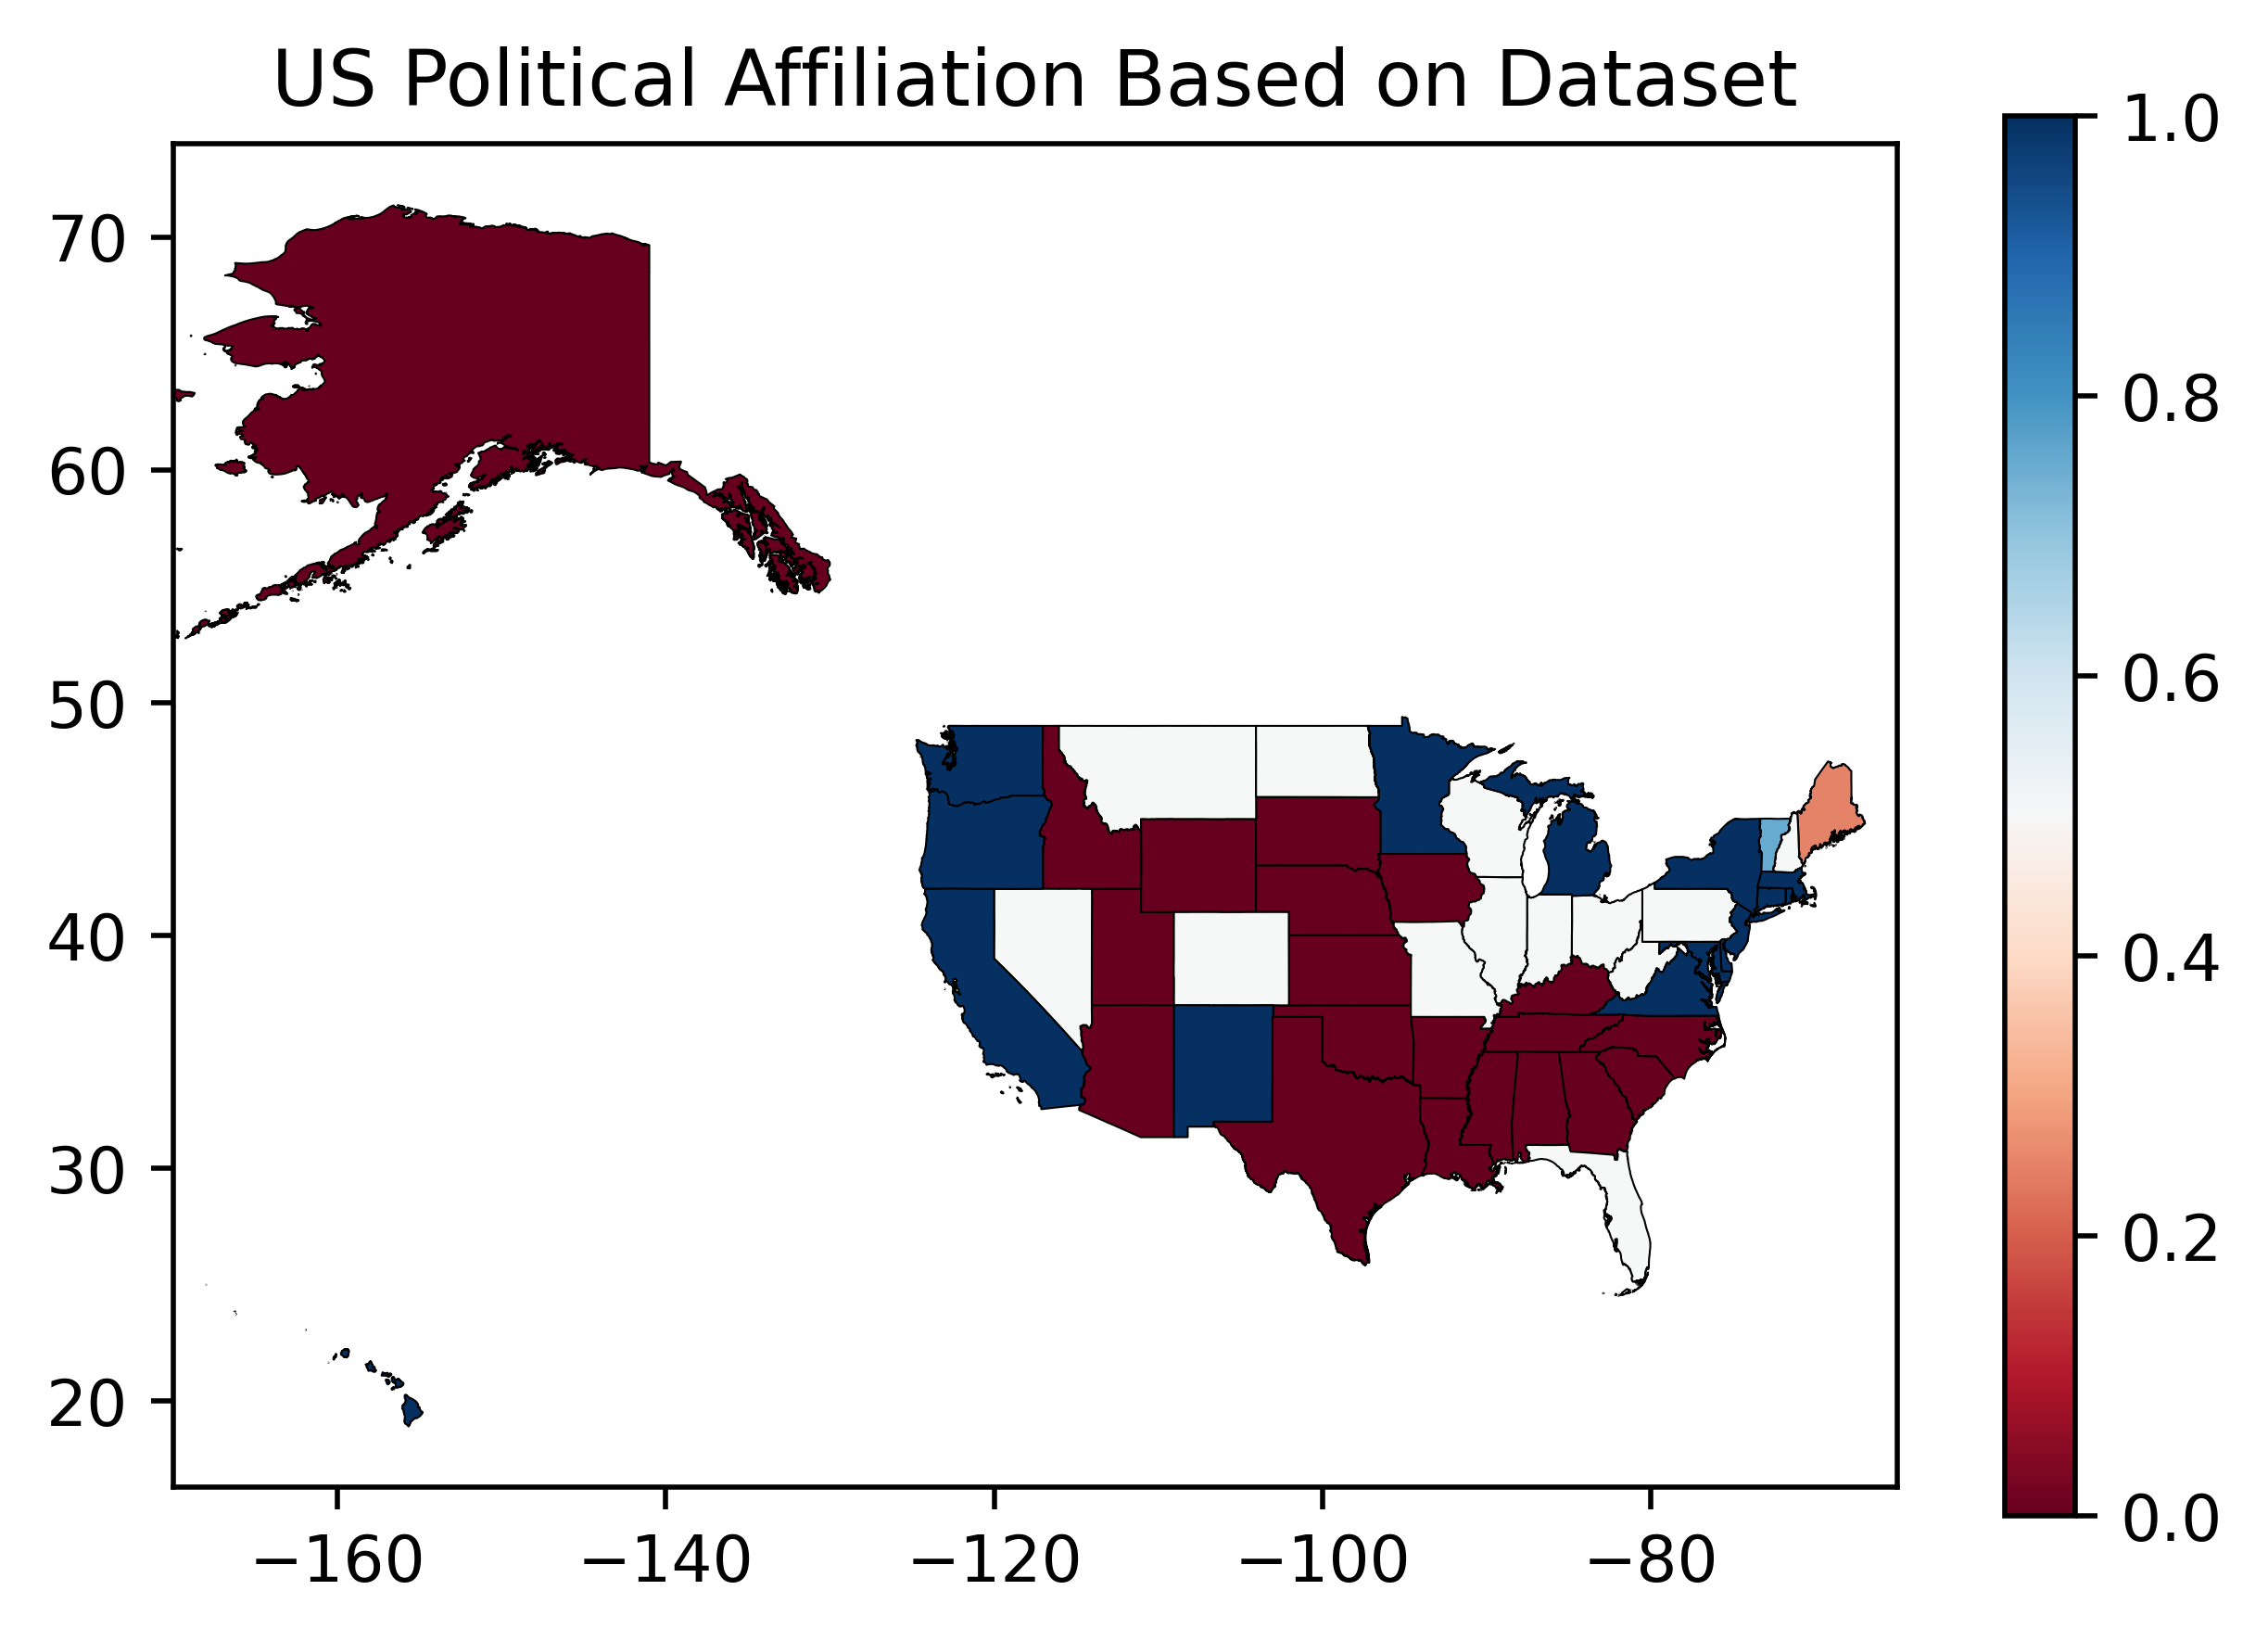

In [357]:
myplt = merged.plot("affiliation", legend=True, cmap="RdBu", edgecolor='black', linewidth=0.3)
myplt.set_title("US Political Affiliation Based on Dataset")
myplt.set_xlim(-170,-65)

Observations
- Closer to 1 means that the state has more Democrats, while closer to 0 means that the state has more Republicans
- The general colors of the states look correct, for example, California and New York are blue, and Alaska and Texas are red
- If there were more data points, the colors would not look so pure and would resemble the actual electoral maps more closely 